# Exercise 5: Peceptual Bistability

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

## 1. Binocular Rivalry

### 1.

In [2]:
def heaviside_step(x):
    if x >= 0:
        return 1.0
    else:
        return 0.0

def laing_chow(x, t, I1, I2, alpha = 0.2, beta = 0.4, phi = 0.4, tau = 20, g1 = 1, g2 = 1):
    u1 = x[0]
    a1 = x[1]
    u2 = x[2]
    a2 = x[3]

    du1_dt = - u1 + heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1)
    du2_dt = - u2 + heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2)
    da1_dt = (-a1 + phi * heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1))/tau
    da2_dt = (-a2 + phi * heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2))/tau

    return [du1_dt, da1_dt, du2_dt, da2_dt]

In [3]:
# u1 = 1, a1 = 0.1, u2 = 0, a2 = 0.25
x0 = [1.0, 0.1, 0.0, 0.25]
t = np.linspace(0, 500, 5001)
I1 = 0.43
I2 = 0.5
a = odeint(laing_chow, x0, t, args=(I1, I2))

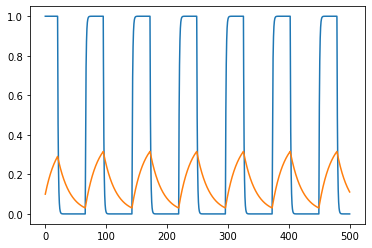

In [4]:
plt.plot(t, a[:, 0])
plt.plot(t, a[:, 1])

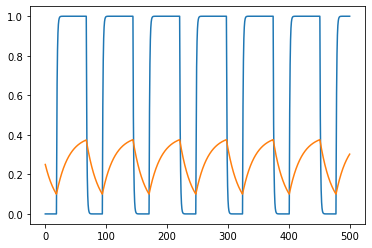

In [5]:
plt.plot(t, a[:, 2])
plt.plot(t, a[:, 3])

### 2.

In [6]:
def dominance_durations(x1, x2, t):
    m_greater = (x1 > x2).astype(int)
    asign = np.sign(m_greater)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(bool)
    dominance = np.diff(t[signchange])[::2]
    return dominance

In [7]:
dominance_durations(a[:, 0], a[:, 2], t)

array([20.4, 28. , 28. , 28. , 28. , 28.1, 28. ])

## 2.

### 1. 

It is a stochastic model.

### 2.

In [8]:
def euler_maruyama(ffun, gfun, x0, t, **args):
    """Euler Maruyama method for stochastic differential equations. x0 must be a list."""
    dts = np.diff(t).astype(float)
    res = np.zeros((len(t), len(x0)))
    res[0] = x0
    
    for i in range(1, len(t)-1):
        # Euler part.
        res[i] = np.multiply(ffun(res[i-1], t, **args), dts[i]) + res[i-1]
        # Stochastic part.
        res[i] = res[i] + gfun(res[i-1], t, **args) * np.sqrt(dts[i]) * np.random.normal(0, 1, 1)
    return res

In [9]:
# Testing method with previous function.
gfun_laing_chow = lambda x, t, **args : 0
a = euler_maruyama(laing_chow, gfun_laing_chow, x0, t, I1 = 0.43, I2 = 0.5)
a.shape

(5001, 4)

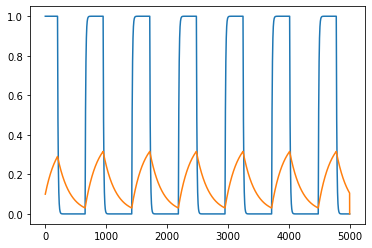

In [10]:
plt.plot(a[:, 0])
plt.plot(a[:, 1])

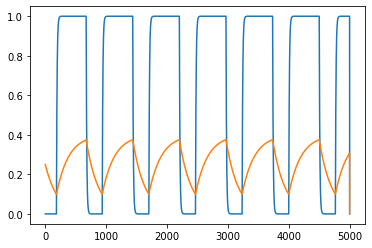

In [11]:
plt.plot(a[:, 2])
plt.plot(a[:, 3])

### 5.3

The starting value for the process is not defined so we set it to 0.

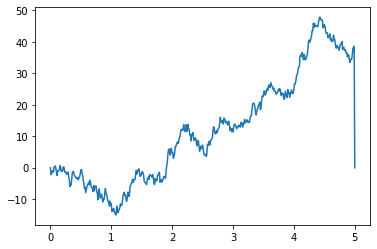

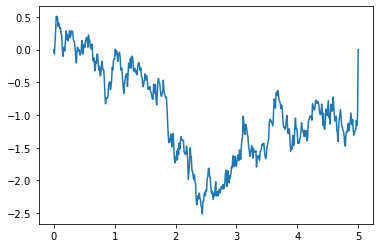

In [12]:
taus = [0.1, 1]
t = np.linspace(0, 5, 5 * 100 + 1)

ffun = lambda x, t, **args : 0
gfun = lambda x, t, **args : 1/tau

for tau in taus:
    res = euler_maruyama(ffun, gfun, [0], t)
    plt.plot(t, res)
    plt.show()

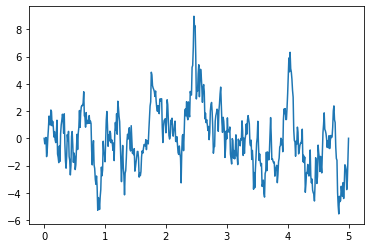

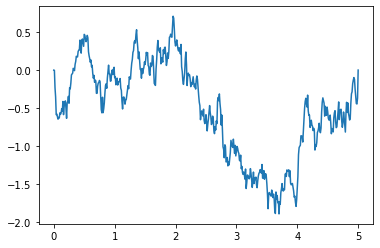

In [13]:
ffun = lambda x, t, **args : -x/tau
for tau in taus:
    res = euler_maruyama(ffun, gfun, [0], t)
    plt.plot(t, res)
    plt.show()

**Compare the results of the four simulations. What is similar? What
is different?**

(hint: Wiener processes and Ornstein-Uhlenbeck processes)

off to sleep yeah, leaving it as todo 